<a href="https://colab.research.google.com/github/saransh-notebooks/dtdc-data-analysis/blob/main/dtdc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install pandas
import pandas as pd


Exploratory Data Analysis (EDA)

In [6]:
df= pd.read_csv("/content/Dataset_Generator_for_DTDC.csv")

In [7]:
pd.set_option('display.max_columns', None)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Origin                 49639 non-null  object 
 1   Destination            49639 non-null  object 
 2   Pouch No               49639 non-null  object 
 3   Date                   49639 non-null  object 
 4   Sender's Name          49639 non-null  object 
 5   Sender Phone           49639 non-null  int64  
 6   Sender Address         49639 non-null  object 
 7   Sender City            49639 non-null  object 
 8   Sender State           49639 non-null  object 
 9   Sender Pincode         49639 non-null  int64  
 10  Sender GSTIN           26778 non-null  object 
 11  Total Pieces           49639 non-null  int64  
 12  Actual Wt              49639 non-null  float64
 13  Volumetric Wt          49639 non-null  float64
 14  Chargeable Wt          49639 non-null  float64
 15  Pa

column to be droped

In [9]:
# List of columns to drop
columns_to_drop = [
    'Pouch No',
    "Sender's Name",
    'Sender Phone',
    'Sender City',
    'Sender GSTIN',
    'Sender Signature',
    'Sender Date',
    'Recipient Name',
    'Recipient Phone',
    'Recipient City',
    'Consignment No',
    'Booking Code',
    'Recipient GSTIN',
    'Company Stamp',
    'Receiver Signature',
    'Paperwork',
    'Receiver Name'
]


In [10]:
# Drop the columns
df_new = df.drop(columns=columns_to_drop)


In [11]:

# Rename specific columns
df_new= df_new.rename(columns={
    'Date': 'Booked Date',
    'Sender State': 'State'
})


In [12]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Origin                 49639 non-null  object 
 1   Destination            49639 non-null  object 
 2   Booked Date            49639 non-null  object 
 3   Sender Address         49639 non-null  object 
 4   State                  49639 non-null  object 
 5   Sender Pincode         49639 non-null  int64  
 6   Total Pieces           49639 non-null  int64  
 7   Actual Wt              49639 non-null  float64
 8   Volumetric Wt          49639 non-null  float64
 9   Chargeable Wt          49639 non-null  float64
 10  Recipient Address      49639 non-null  object 
 11  Receiver State         49639 non-null  object 
 12  Receiver Pincode       49639 non-null  int64  
 13  Description            49639 non-null  object 
 14  Value Added Services   39399 non-null  object 
 15  Ex

Route Optimization


1.Most Frequent Origin → Destination Pairs
Find which city-to-city courier routes are used the most (high shipment volume).
This helps DTDC prioritize those routes for optimization (e.g. cost, speed, staffing).

In [13]:
# Create a new column that combines Origin and Destination into one Route
df_new['Route'] = df['Origin'] + " → " + df['Destination']

In [16]:
top_routes = df_new['Route'].value_counts().head(10)

In [17]:
# Display the result
print("Top 10 Most Frequent Routes:")
print(top_routes)

Top 10 Most Frequent Routes:
Route
Srinagar → Kochi               60
Jamshedpur → Hyderabad         59
Ahmedabad → Aurangabad         57
Shimla → Nagpur                57
Ahmedabad → Mumbai             56
Jamshedpur → Jaipur            55
Meerut → Thiruvananthapuram    55
Pune → Bangalore               54
Jaipur → Aurangabad            54
Aurangabad → Ludhiana          54
Name: count, dtype: int64


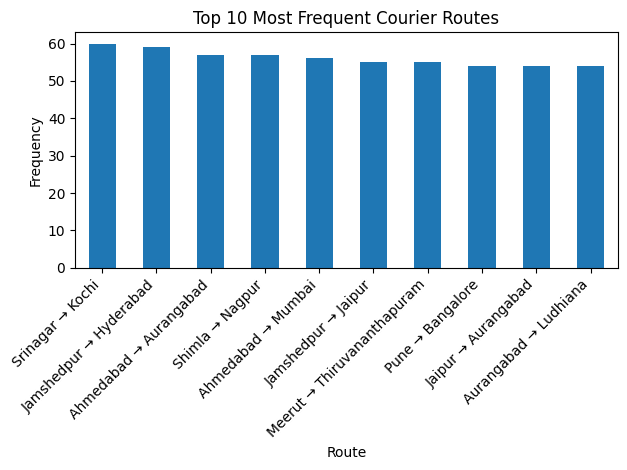

In [18]:
import matplotlib.pyplot as plt

# Create a bar plot of the top_routes Series
top_routes.plot(kind='bar')

# Add a title and labels for better readability
plt.title('Top 10 Most Frequent Courier Routes')
plt.xlabel('Route')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels for better visibility
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

2.Average Delivery Time by Route

Find out how long deliveries take on each route on average.
This helps you identify:

Fastest routes (well-optimized)

Slowest routes (need attention)

In [19]:
#datetime format
df_new['Booked Date'] = pd.to_datetime(df_new['Booked Date'])
df_new['Receive Date'] = pd.to_datetime(df_new['Receive Date'])


In [20]:
# New column: Delivery time in days
df_new['Delivery Days'] = (df_new['Receive Date'] - df_new['Booked Date'])

In [21]:
# Group by Route and take average
avg_delivery = df_new.groupby('Route')['Delivery Days'].mean().sort_values()

In [22]:
# Show top 10 fastest routes
print("Top 10 Fastest Routes (by average delivery days):")
print(avg_delivery.head(10))

Top 10 Fastest Routes (by average delivery days):
Route
Delhi → Surat                    2 days 08:00:00
Jamshedpur → Mumbai              2 days 09:00:00
Aurangabad → Raipur    2 days 09:08:34.285714285
Aurangabad → Jaipur              2 days 09:36:00
Meerut → Jaipur                  2 days 09:46:40
Raipur → Indore                  2 days 10:24:00
Vizag → Amritsar       2 days 10:36:16.744186046
Chandigarh → Lucknow   2 days 10:44:12.631578947
Chandigarh → Delhi     2 days 11:07:19.024390243
Pune → Ludhiana        2 days 11:36:46.451612903
Name: Delivery Days, dtype: timedelta64[ns]


In [24]:
print("Top 10 Slowest Routes:")
print(avg_delivery.tail(10))


Top 10 Slowest Routes:
Route
Kolkata → Chandigarh               3 days 13:12:00
Lucknow → Amritsar       3 days 13:16:35.744680851
Chandigarh → Bangalore             3 days 13:20:00
Ranchi → Coimbatore      3 days 13:32:18.461538461
Nashik → Lucknow                   3 days 13:48:00
Agra → Jamshedpur        3 days 14:16:12.972972973
Kolkata → Bhubaneswar    3 days 14:16:12.972972973
Ranchi → Chandigarh                3 days 15:06:40
Chennai → Patna          3 days 16:14:07.058823529
Nagpur → Kochi                     3 days 21:00:00
Name: Delivery Days, dtype: timedelta64[ns]


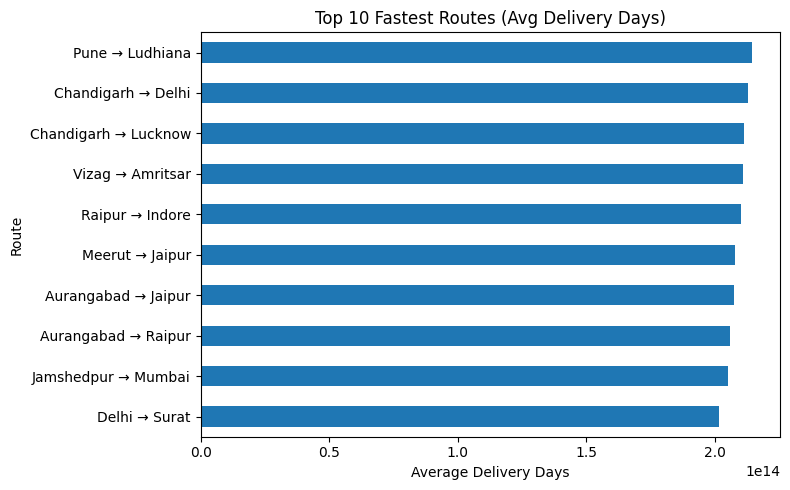

In [25]:
avg_delivery.head(10).plot(kind='barh', title='Top 10 Fastest Routes (Avg Delivery Days)', figsize=(8,5))
plt.xlabel("Average Delivery Days")
plt.ylabel("Route")
plt.tight_layout()
plt.show()


In [26]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Origin                 49639 non-null  object         
 1   Destination            49639 non-null  object         
 2   Booked Date            49639 non-null  datetime64[ns] 
 3   Sender Address         49639 non-null  object         
 4   State                  49639 non-null  object         
 5   Sender Pincode         49639 non-null  int64          
 6   Total Pieces           49639 non-null  int64          
 7   Actual Wt              49639 non-null  float64        
 8   Volumetric Wt          49639 non-null  float64        
 9   Chargeable Wt          49639 non-null  float64        
 10  Recipient Address      49639 non-null  object         
 11  Receiver State         49639 non-null  object         
 12  Receiver Pincode       49639 non-null  int64  

In [28]:
df_new['Mode'].unique()

array(['Express', 'Surface', 'Air Cargo'], dtype=object)

Weight & Volume Impact on Cost

In [29]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49639 entries, 0 to 49638
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   Origin                 49639 non-null  object         
 1   Destination            49639 non-null  object         
 2   Booked Date            49639 non-null  datetime64[ns] 
 3   Sender Address         49639 non-null  object         
 4   State                  49639 non-null  object         
 5   Sender Pincode         49639 non-null  int64          
 6   Total Pieces           49639 non-null  int64          
 7   Actual Wt              49639 non-null  float64        
 8   Volumetric Wt          49639 non-null  float64        
 9   Chargeable Wt          49639 non-null  float64        
 10  Recipient Address      49639 non-null  object         
 11  Receiver State         49639 non-null  object         
 12  Receiver Pincode       49639 non-null  int64  

In [31]:
df_new[['Actual Wt', 'Volumetric Wt','Volumetric Wt','Total Amount']].isnull().sum()

,0
Actual Wt,0
Volumetric Wt,0
Volumetric Wt,0
Total Amount,0


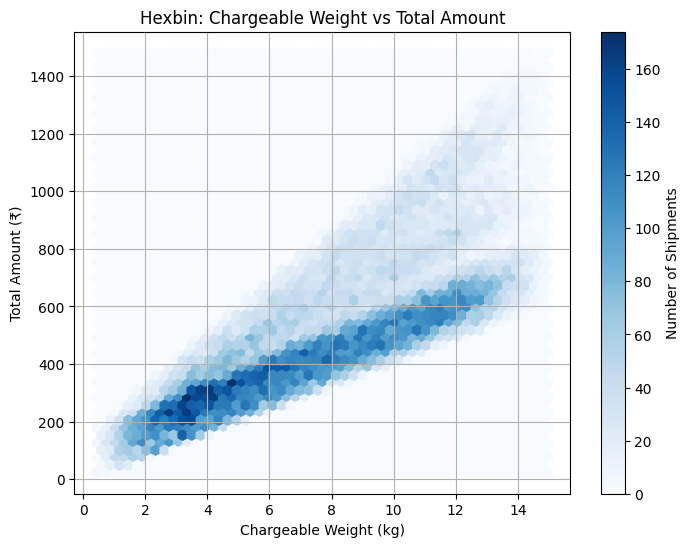

In [37]:
plt.figure(figsize=(8,6))
plt.hexbin(df['Chargeable Wt'], df['Total Amount'], gridsize=50, cmap='Blues')
plt.colorbar(label='Number of Shipments')
plt.title('Hexbin: Chargeable Weight vs Total Amount')
plt.xlabel('Chargeable Weight (kg)')
plt.ylabel('Total Amount (₹)')
plt.grid(True)
plt.show()


"Most customers send medium-weight packages (2–8 kg) and usually pay ₹200–₹600. As weight increases, cost increases. But for the same weight, the cost may still vary depending on other factors."

High Revenue Generating Cities / Routes

In [41]:
city_revenue = df.groupby('Destination')['Total Amount'].sum().reset_index().sort_values(by='Total Amount', ascending=False)


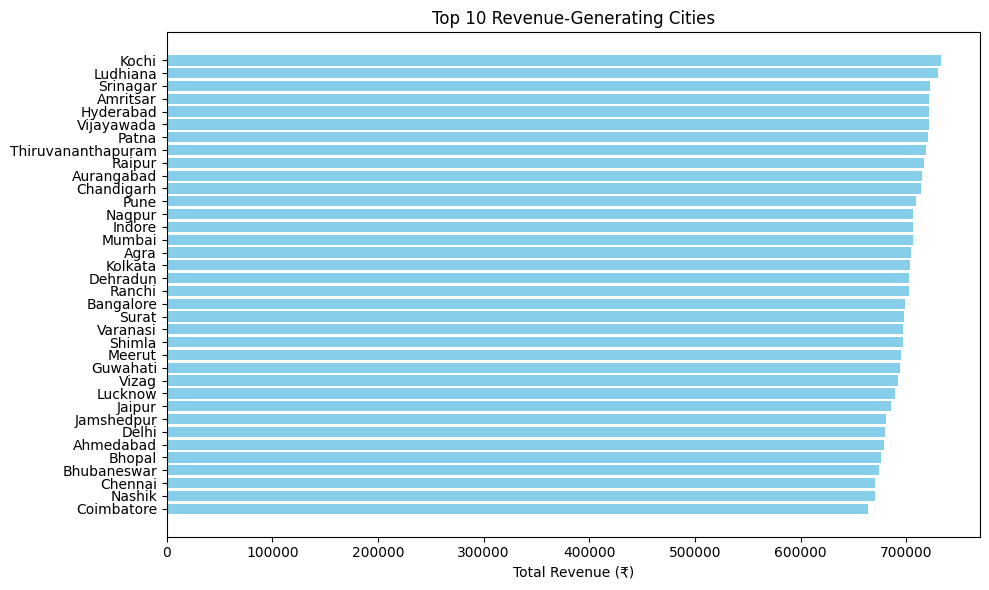

In [48]:

plt.figure(figsize=(10,6))
plt.barh(city_revenue['Destination'], city_revenue['Total Amount'], color='skyblue')
plt.xlabel("Total Revenue (₹)")
plt.title("Top 10 Revenue-Generating Cities")
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()
